In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import zipfile

In [43]:
zip_path= r"C:\Users\HP\Downloads\amazon_dataset.zip"
extract_to="data_extracted/"
with zipfile.ZipFile(zip_path,"r") as zip_ref:
    zip_ref.extractall(extract_to)
print("Extraction Completed")

Extraction Completed


In [44]:
csv_files=[f for f in os.listdir(extract_to) if f.endswith(".csv")]
if not csv_files:
   print("No CSV files found")
   exit()


In [45]:
file_path=os.path.join(extract_to,csv_files[0])
df=pd.read_csv(file_path,encoding="utf-8")

In [46]:
print("Initial Data Preview:")
df.head()

Initial Data Preview:


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"


In [47]:
print("\nData Summary:")
df.info()
      


Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            720 non-null    object
 1   main_category   720 non-null    object
 2   sub_category    720 non-null    object
 3   image           720 non-null    object
 4   link            720 non-null    object
 5   ratings         433 non-null    object
 6   no_of_ratings   433 non-null    object
 7   discount_price  457 non-null    object
 8   actual_price    500 non-null    object
dtypes: object(9)
memory usage: 50.8+ KB


In [48]:
print("Colums Names:")
df.columns


Colums Names:


Index(['name', 'main_category', 'sub_category', 'image', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')

In [49]:
print("Missing values in each columns:")
df.isnull().sum()

Missing values in each columns:


name                0
main_category       0
sub_category        0
image               0
link                0
ratings           287
no_of_ratings     287
discount_price    263
actual_price      220
dtype: int64

In [50]:
print("Checking for Duplicates:")
df.duplicated().sum()

Checking for Duplicates:


0

In [51]:
print("Data Types:")
df.dtypes

Data Types:


name              object
main_category     object
sub_category      object
image             object
link              object
ratings           object
no_of_ratings     object
discount_price    object
actual_price      object
dtype: object

In [52]:
df['actual_price']=df['actual_price'].str.replace("₹","").str.replace(",","").astype(float)
df['discount_price']=df['discount_price'].str.replace("₹","").str.replace(",","").astype(float)
df[['actual_price','discount_price']].head()

,actual_price,discount_price
0,58990.0,32999.0
1,75990.0,46490.0
2,61990.0,34490.0
3,68990.0,37990.0
4,67790.0,34490.0


In [53]:
df['discount_percentage']=((df['actual_price']-df['discount_price'])/df['actual_price'])*100
df[['actual_price', 'discount_price', 'discount_percentage']].head()

,actual_price,discount_price,discount_percentage
0,58990.0,32999.0,44.060010
1,75990.0,46490.0,38.820897
2,61990.0,34490.0,44.361994
3,68990.0,37990.0,44.934048
4,67790.0,34490.0,49.122289


In [54]:
df['ratings'].unique()

array(['4.2', '4.0', '4.1', '4.3', '3.9', '3.8', '3.5', nan, '4.6', '3.3',
       '3.4', '3.7', '2.9', '5.0', '4.4', '3.6', '2.7', '4.5', '3.0',
       '3.1', '3.2', '4.8', '4.7', '2.5', '1.0', '2.6', '2.8', '2.3',
       '1.7', 'Get', '1.8', '2.4'], dtype=object)

In [55]:
df['ratings']=pd.to_numeric(df['ratings'],errors='coerce')

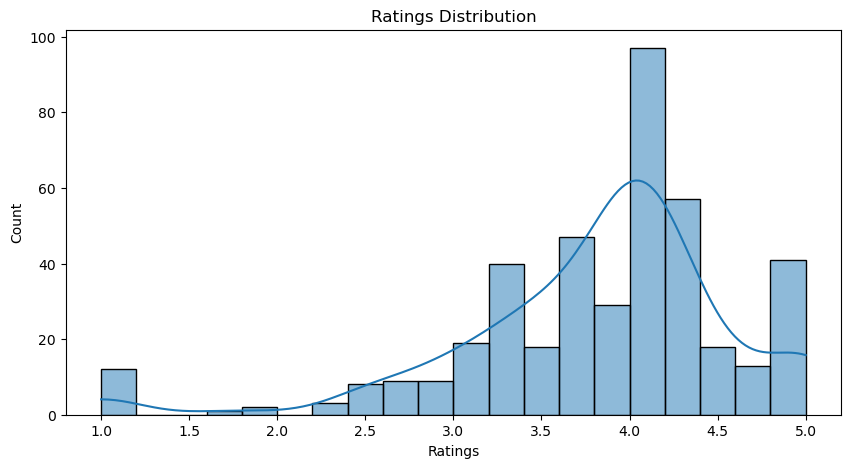

In [56]:
plt.figure(figsize=(10,5))
sns.histplot(df['ratings'].dropna().astype(float),bins=20,kde=True)
plt.title("Ratings Distribution")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.show()

In [57]:
df['no_of_ratings'].unique()


array(['2,255', '2,948', '1,206', '69', '630', '1,666', '1,097', '1,494',
       '674', '801', '558', '730', '5,073', '568', '3,670', '312', '88',
       '432', '268', '2', '700', '540', '258', '2,178', nan, '1,444',
       '360', '38', '1,208', '341', '3', '15', '925', '3,604', '42', '22',
       '94', '1,866', '292', '1,830', '8', '536', '201', '2,722', '202',
       '23', '1,195', '5', '66', '474', '502', '686', '1,183', '56', '1',
       '49', '212', '79', '468', '317', '45', '142', '451', '145', '265',
       '3,157', '274', '39', '178', '655', '81', '43', '234', '134', '97',
       '229', '12', '748', '926', '62', '14', '440', '85', '260', '118',
       '172', '387', '195', '7', '158', '9', '10', '1,295', '16', '303',
       '120', '55', '27', '34', '37', '1,573', '29', '6', '112', '200',
       '11', '121', '886', '209', '4', '207', '622', '31', '192', '40',
       '101', '96', '70', '259', '1,400', '288', '13', '51', '175', '114',
       '567', '187', '21', '1,832', '563', '24'

In [58]:

df['no_of_ratings'] = df['no_of_ratings'].str.replace(',', '', regex=True)
df['no_of_ratings'] = pd.to_numeric(df['no_of_ratings'], errors='coerce')
df = df.dropna(subset=['no_of_ratings'])
df['no_of_ratings'] = df['no_of_ratings'].astype(int)
df['no_of_ratings'].unique()


[2255 2948 1206   69  630 1666 1097 1494  674  801  558  730 5073  568
 3670  312   88  432  268    2  700  540  258 2178 1444  360   38 1208
  341    3   15  925 3604   42   22   94 1866  292 1830    8  536  201
 2722  202   23 1195    5   66  474  502  686 1183   56    1   49  212
   79  468  317   45  142  451  145  265 3157  274   39  178  655   81
   43  234  134   97  229   12  748  926   62   14  440   85  260  118
  172  387  195    7  158    9   10 1295   16  303  120   55   27   34
   37 1573   29    6  112  200   11  121  886  209    4  207  622   31
  192   40  101   96   70  259 1400  288   13   51  175  114  567  187
   21 1832  563   24  769  542  297  329   20  156   26  485 9577  302
  255 1420  169 3562  224   25  449  218  913  373  776   60   54   19
   74   17  213  430  591  247   41  222   71  290   65   18   32  130
  416   64  119   59   68   36  164   77   47   98  581  398  774  232
   44   50  296]


In [70]:
top_rated = df[(df['no_of_ratings'] > 1000)].sort_values(by='ratings', ascending=False).head(10)
print("\nTop 10 Rated Products:")
top_rated[['name','ratings', 'no_of_ratings']]

most_reviewed = df.sort_values(by='no_of_ratings', ascending=False).head(10)
print("\nTop 10 Most Reviewed Products:")
most_reviewed[['name','ratings', 'no_of_ratings']]




Top 10 Rated Products:
                                                  name  ratings  no_of_ratings
245  LG 1.5 Ton 5 Star Inverter Split AC (Copper, S...      4.4           3562
133  Voltas 1.4 Ton 5 Star Inverter Adjustable Spli...      4.3           1295
7    Lloyd 1.5 Ton 5 Star Inverter Split Ac (5 In 1...      4.3           1494
12   Panasonic 1.5 Ton 5 Star Wi-Fi Inverter Smart ...      4.3           5073
23   Panasonic 1 Ton 5 Star Wi-Fi Inverter Smart Sp...      4.3           2178
1    LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...      4.2           2948
242  LG 1.5 Ton 5 Star Dual Inverter Split AC (Copp...      4.2           1420
151  Voltas 1.5 Ton 3 Star Inverter Split AC (Coppe...      4.2           1573
44   Blue Star 0.8 Ton 3 Star Inverter Split Ac (Co...      4.2           2722
39   Panasonic 1.5 Ton 3 Star Wi-Fi Inverter Smart ...      4.2           1830

Top 10 Most Reviewed Products:
                                                  name  ratings  no_of_rati

In [72]:
df['main_category'].unique()

array(['appliances'], dtype=object)

In [74]:
df['sub_category'].unique()

array(['Air Conditioners'], dtype=object)

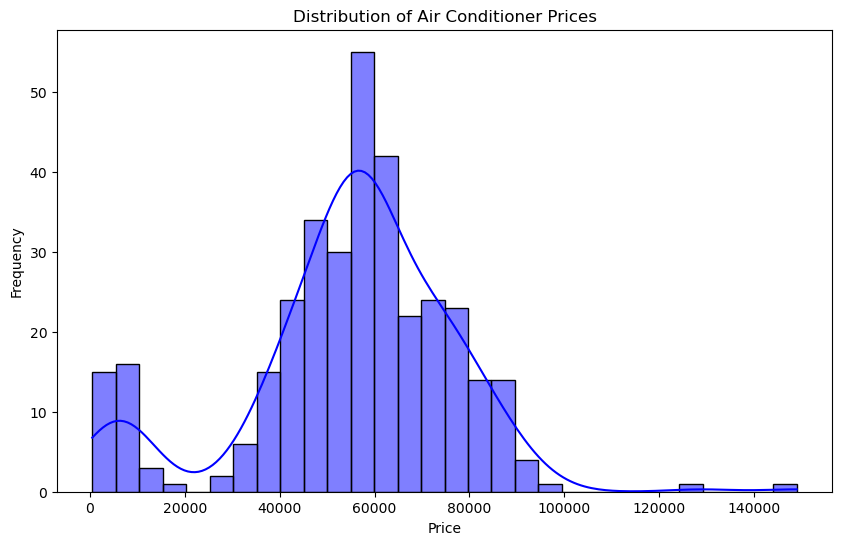

In [75]:
plt.figure(figsize=(10,6))
sns.histplot(df['actual_price'],bins=30,kde=True,color='blue')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Air Conditioner Prices")
plt.show()

Text(0.5, 1.0, 'Distribution of Discount Percentages')

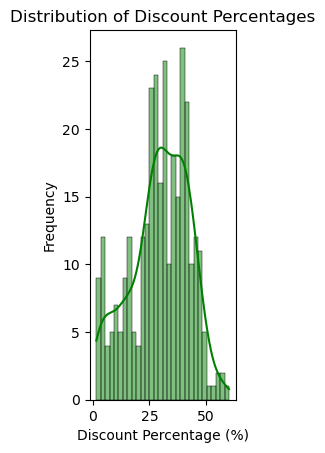

In [76]:
plt.subplot(1, 3, 2)
sns.histplot(df['discount_percentage'], bins=30, kde=True, color='green')
plt.xlabel("Discount Percentage (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Discount Percentages")

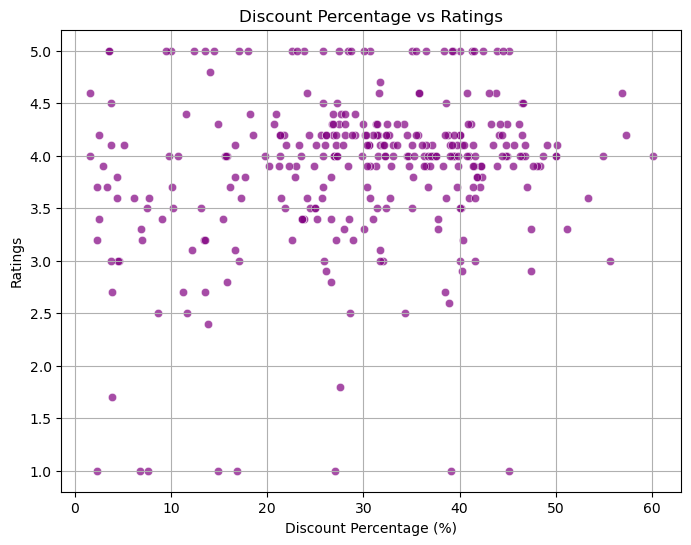

In [77]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['discount_percentage'], y=df['ratings'], alpha=0.7, color='purple')
plt.xlabel("Discount Percentage (%)")
plt.ylabel("Ratings")
plt.title("Discount Percentage vs Ratings")
plt.grid(True)
plt.show()

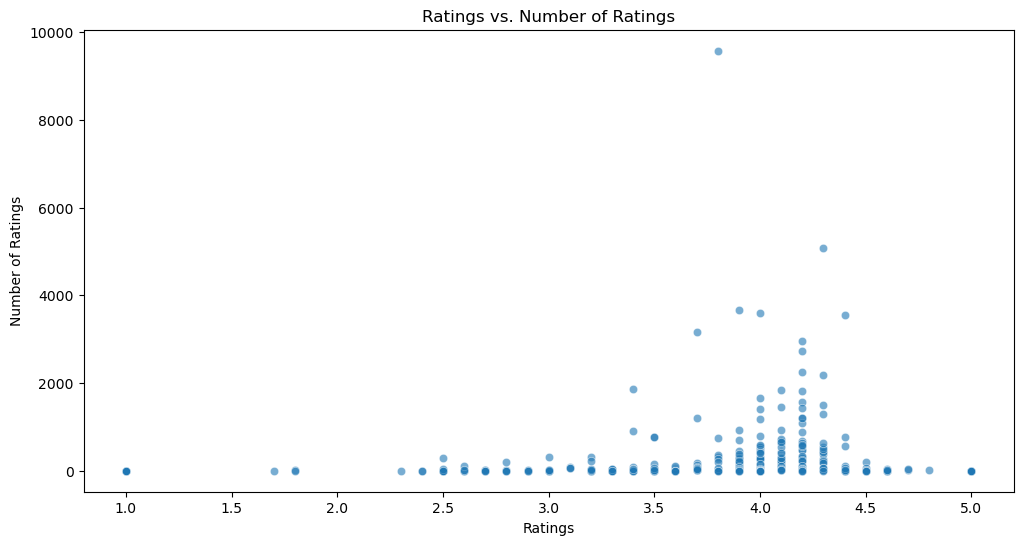

In [78]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='ratings', y='no_of_ratings', data=df, alpha=0.6)
plt.title("Ratings vs. Number of Ratings")
plt.xlabel("Ratings")
plt.ylabel("Number of Ratings")
plt.show()


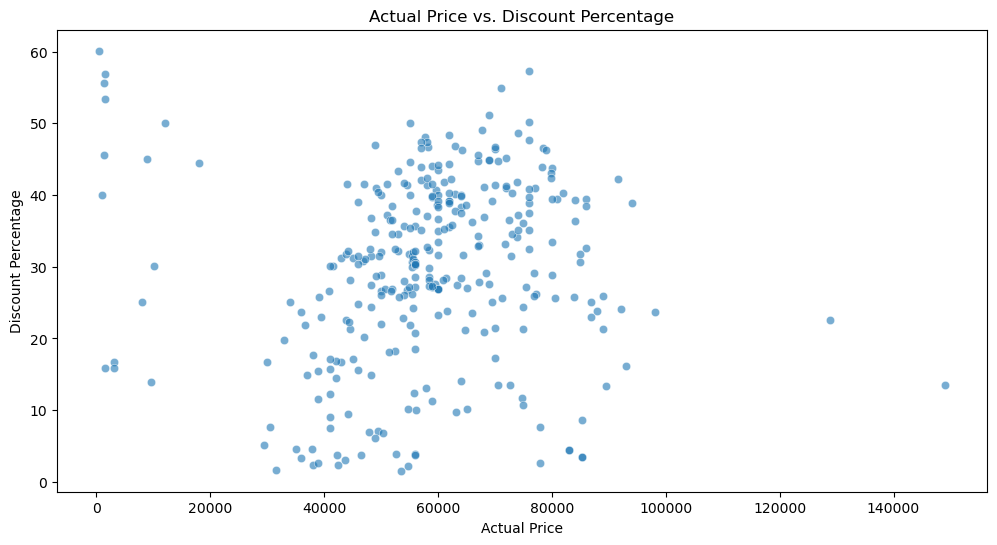

In [79]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='actual_price', y='discount_percentage', data=df, alpha=0.6)
plt.title("Actual Price vs. Discount Percentage")
plt.xlabel("Actual Price")
plt.ylabel("Discount Percentage")
plt.show()


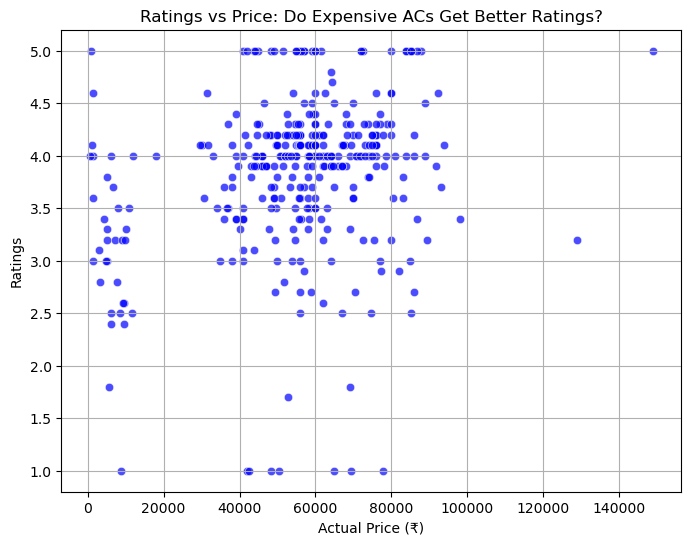

In [80]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['actual_price'], y=df['ratings'], alpha=0.7, color='blue')
plt.xlabel("Actual Price (₹)")
plt.ylabel("Ratings")
plt.title("Ratings vs Price: Do Expensive ACs Get Better Ratings?")
plt.grid(True)
plt.show()

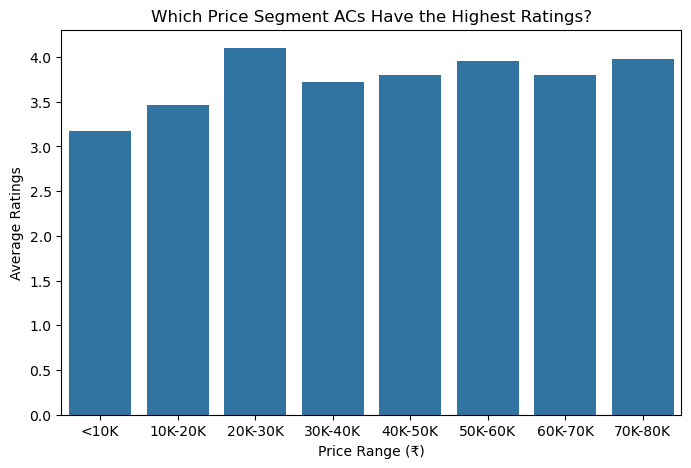

In [85]:
price_bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000]
labels = ["<10K", "10K-20K", "20K-30K", "30K-40K", "40K-50K", "50K-60K", "60K-70K", "70K-80K"]
df['price_range'] = pd.cut(df['actual_price'], bins=price_bins, labels=labels)

avg_ratings_by_price = df.groupby('price_range',observed=False)['ratings'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_ratings_by_price.index, y=avg_ratings_by_price.values)
plt.xlabel("Price Range (₹)")
plt.ylabel("Average Ratings")
plt.title("Which Price Segment ACs Have the Highest Ratings?")
plt.show()


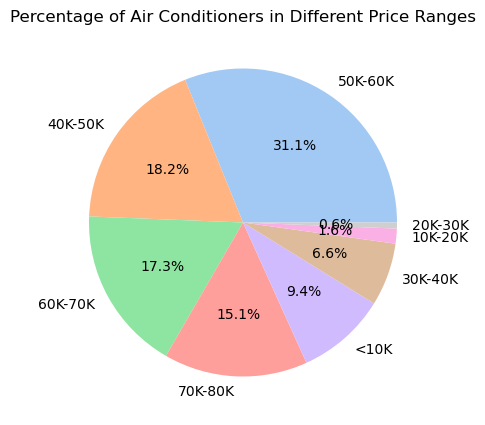

In [86]:
price_distribution = df['price_range'].value_counts()
plt.figure(figsize=(8, 5))
plt.pie(price_distribution, labels=price_distribution.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Percentage of Air Conditioners in Different Price Ranges")
plt.show()